In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from holoviews.operation import threshold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from statsmodels.sandbox.regression.example_kernridge import scale

In [2]:
df = pd.read_csv('datasets/housing/housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


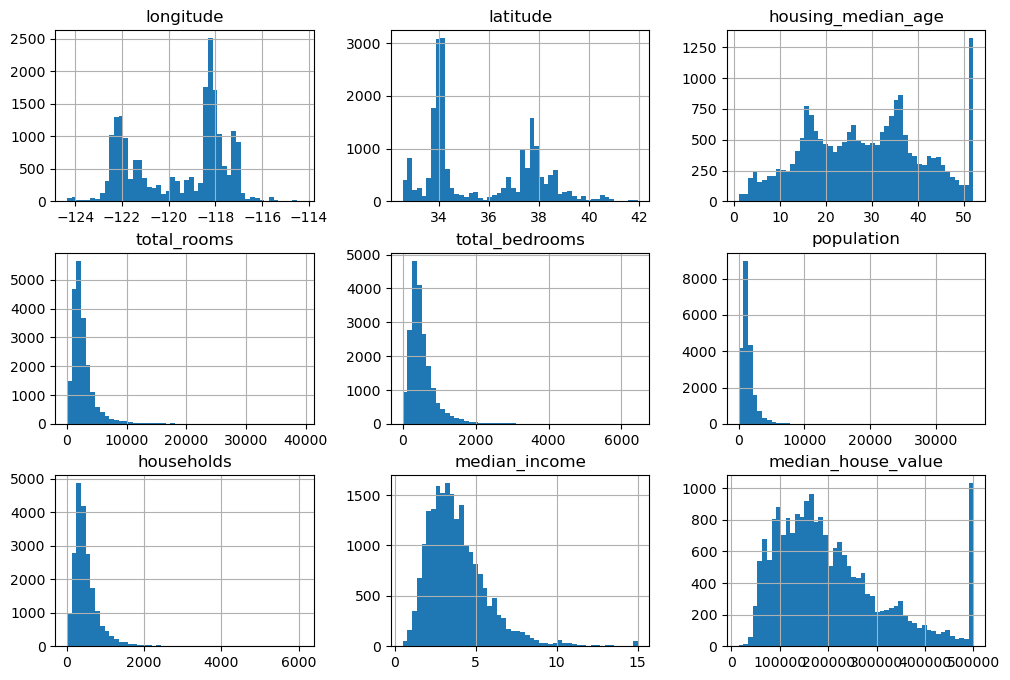

In [8]:
df.hist(bins=50, figsize=(12, 8))
plt.show()

In [9]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
df["income_cat"] = pd.cut(df["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

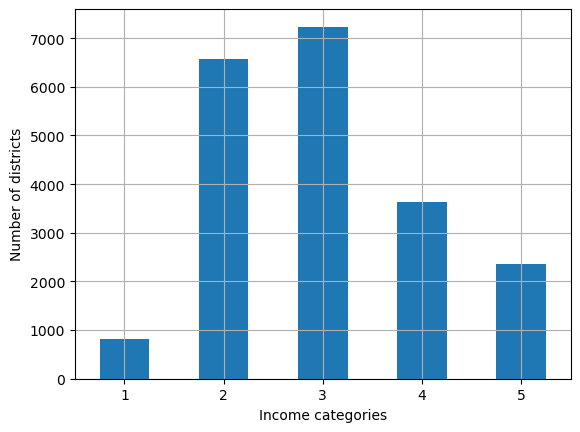

In [12]:
df["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Income categories')
plt.ylabel('Number of districts')
plt.show()

In [13]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(df, df['income_cat']):
    strat_train_set_n = df.iloc[train_index]
    strat_test_set_n = df.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [14]:
strat_train_set, strat_test_set = strat_splits[0]

In [15]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

C:\Users\Dimas\AppData\Local\Temp\ipykernel_11720\1002338871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('income_cat', axis=1, inplace=True)
C:\Users\Dimas\AppData\Local\Temp\ipykernel_11720\1002338871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('income_cat', axis=1, inplace=True)


In [17]:
housing = strat_train_set.copy()

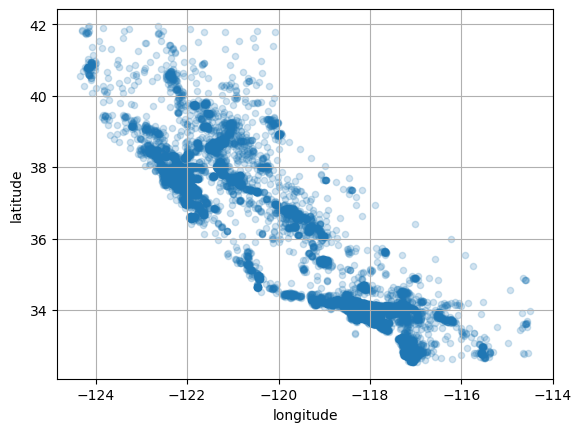

In [18]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, grid=True)
plt.show()

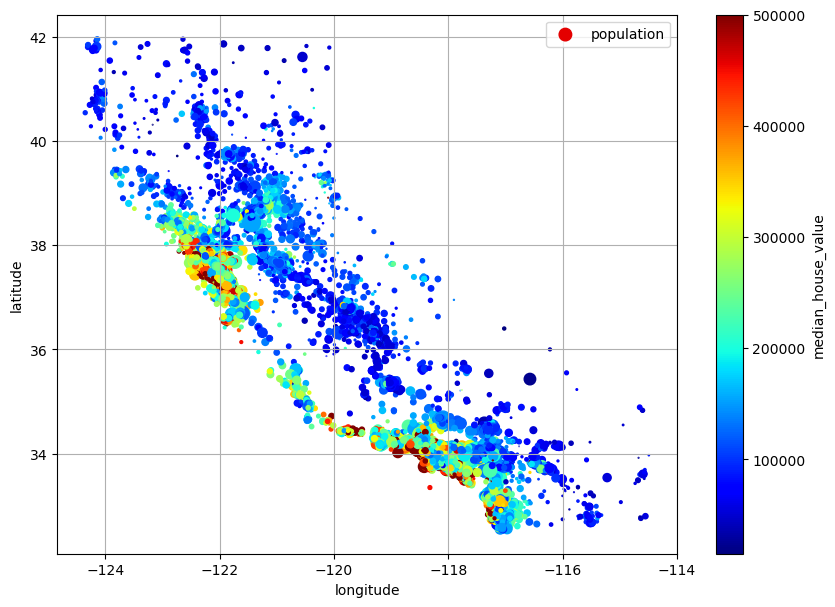

In [19]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True, s=housing["population"] / 100, label="population", c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=True, figsize=(10, 7))
plt.show()

In [20]:
corr_matrix = housing.corr(numeric_only=True)

In [21]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

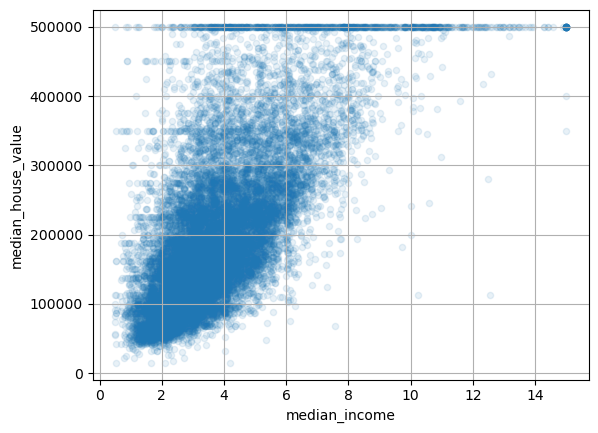

In [22]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, grid=True)
plt.show()

In [23]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ration"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [24]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ration      -0.256397
Name: median_house_value, dtype: float64

In [25]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [26]:
imputer = SimpleImputer(strategy="median")

In [27]:
housing_num = housing.select_dtypes(include="number")

In [28]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [29]:
X = imputer.transform(housing_num)

In [30]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [31]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [32]:
type(housing_cat_encoded)

numpy.ndarray

In [33]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [34]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [35]:
type(housing_cat_1hot)

scipy.sparse._csr.csr_matrix

In [36]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.fit_transform(housing[["population"]])

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [38]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2]

array([[-1.42303652,  1.0136059 ,  1.86111875,  0.31191221,  1.36816703,
         0.13746004,  1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, -0.30861991, -0.43592476,
        -0.69377062, -0.37348471,  1.17194198]])

In [39]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude",
               "housing_median_age", "total_rooms",
               "total_bedrooms", "population",
               "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [40]:
housing_prepared = preprocessing.fit_transform(housing)

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=42):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(n_clusters=self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [42]:
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline

def column_ration(X):
    return X[:, [0]] / X[:, [1]]

def ration_name(function_transformer, feature_names_in):
    return ["ration"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"), 
        FunctionTransformer(column_ration, feature_names_out=ration_name),
        StandardScaler()
    )

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)
preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", 
                                    "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", 
                                           "households"]),
    ("people_per_house", ratio_pipeline(), ["population", 
                                            "households"]),
    ("log", log_pipeline, ["total_bedrooms",
                           "total_rooms", 
                           "population",
                           "households",
                           "median_income"]),
    ("geo", cluster_simil, ["latitude",
                            "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
], remainder=default_num_pipeline)

In [43]:
housing_prepared = preprocessing.fit_transform(housing)

In [44]:
housing.shape

(16512, 9)

In [45]:
housing_prepared.shape

(16512, 24)

In [46]:
preprocessing.get_feature_names_out()

array(['bedrooms__ration', 'rooms_per_house__ration',
       'people_per_house__ration', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [47]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(
    preprocessing,
    DecisionTreeRegressor(random_state=42)
)

tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ration_name at 0x00...
                                                   'median_income']),
                                                 ('geo', ClusterSimilarity(),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000282DE0FDAF0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [48]:
housing_pred = tree_reg.predict(housing)

In [49]:
from sklearn.metrics import mean_squared_error
tree_rmse = mean_squared_error(housing_labels, housing_pred, squared=False)
tree_rmse

E:\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.0

In [50]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing,
                              housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [65]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     67013.360949
std       1460.198570
min      64289.376198
25%      66776.146282
50%      67086.216281
75%      68140.275029
max      68659.294290
dtype: float64

In [52]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(
    preprocessing,
    RandomForestRegressor(random_state=42)
)

forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [66]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47124.604437
std       1069.311372
min      45292.329302
25%      46712.106520
50%      47172.209883
75%      47561.377695
max      49354.705514
dtype: float64

In [54]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])

param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring="neg_root_mean_squared_error")
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000282DE0FDAF0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [55]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [56]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values("mean_test_score", ascending=False, inplace=True)

In [57]:
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,4.613522,0.021356,0.113898,0.000415,15,6,"{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}",-43520.694854,-43958.237963,-44759.841846,-44079.591555,513.105796,1
13,5.986463,0.048204,0.113835,0.000233,15,8,"{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 8}",-44027.285408,-44179.627865,-45007.255144,-44404.722806,430.570141,2
14,7.567543,0.197068,0.117705,0.006574,15,10,"{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 10}",-44402.775080,-44618.770051,-45423.947846,-44815.164326,439.413615,3
7,4.482001,0.028612,0.110534,0.001050,10,6,"{'preprocessing__geo__n_clusters': 10, 'random_forest__max_features': 6}",-44250.873441,-44825.226423,-45610.878897,-44895.659587,557.449151,4
9,4.571638,0.039529,0.114865,0.002772,10,6,"{'preprocessing__geo__n_clusters': 10, 'random_forest__max_features': 6}",-44250.873441,-44825.226423,-45610.878897,-44895.659587,557.449151,4


In [58]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters':
                      randint(low=3, high=50),
                  'random_forest__max_features':
                      randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3, scoring="neg_root_mean_squared_error", random_state=42)
rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000282DD88D910>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000282DD8F3C80>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [59]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.06, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.02, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.01, 0.01,
       0.01, 0.  , 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.04, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [60]:
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()),reverse=True)

[(0.18836603202647126, 'log__median_income'),
 (0.07795960969938898, 'cat__ocean_proximity_INLAND'),
 (0.06110388595864347, 'bedrooms__ration'),
 (0.05772194900488602, 'rooms_per_house__ration'),
 (0.04569274355282605, 'people_per_house__ration'),
 (0.041977095119231075, 'geo__Cluster 30 similarity'),
 (0.024893290428216707, 'geo__Cluster 9 similarity'),
 (0.02349145973584661, 'geo__Cluster 36 similarity'),
 (0.021384735075780065, 'geo__Cluster 18 similarity'),
 (0.019231937253583756, 'geo__Cluster 3 similarity'),
 (0.019114201150802552, 'geo__Cluster 32 similarity'),
 (0.01740110192655986, 'geo__Cluster 25 similarity'),
 (0.016281601452371793, 'geo__Cluster 1 similarity'),
 (0.015974756525084677, 'geo__Cluster 26 similarity'),
 (0.014014150061434243, 'geo__Cluster 7 similarity'),
 (0.013588284206905332, 'geo__Cluster 10 similarity'),
 (0.01344850861123562, 'geo__Cluster 12 similarity'),
 (0.013432151644106247, 'geo__Cluster 34 similarity'),
 (0.012971875049373518, 'geo__Cluster 19 sim

In [62]:
from sklearn.svm import SVR

param_grid = [
    {'svr__kernel': ['linear'], 'svr__C': [1., 30., 100., 1000., 10000., 30000.]},
    {'svr__kernel': ['rbf'], 'svr__C': [1., 3., 10., 30., 100., 300., 1000.], 'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
]

svr_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("svr", SVR())
])

grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3, scoring="neg_root_mean_squared_error")
grid_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000282DE0FDAF0>)])),
                                       ('svr', SVR())]),
             param_grid=[{'svr__C': [1.0, 30.0, 100.0, 1000.0, 10000.0,
                                     30000.0],
                          'svr__kernel': ['linear']},
                         {'svr__C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0,
                                     1000.0],
                          'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'svr__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error')

In [63]:
svr_grid_search_rmse = -grid_search.best_score_
svr_grid_search_rmse

70059.92773182406

In [64]:
grid_search.best_params_

{'svr__C': 10000.0, 'svr__kernel': 'linear'}

In [67]:
from scipy.stats import expon, loguniform

param_distribs = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': loguniform(20, 200_000),
    'svr__gamma': expon(scale=1.0)
}

rnd_search = RandomizedSearchCV(svr_pipeline, param_distributions=param_distribs, n_iter=50, cv=3, scoring="neg_root_mean_squared_error", random_state=42)
rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x00000282DE0FDAF0>)])),
                                             ('svr', SVR())]),
                   n_iter=50,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000282DD65F7A0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000282DE341760>,
                                        'svr__kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [69]:
svr_rnd_search_rmse = -rnd_search.best_score_
svr_rnd_search_rmse

56152.05369931814

In [70]:
rnd_search.best_params_

{'svr__C': 157055.10989448498,
 'svr__gamma': 0.26497040005002437,
 'svr__kernel': 'rbf'}

In [71]:
from sklearn.feature_selection import SelectFromModel

selector_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('selector', SelectFromModel(RandomForestRegressor(random_state=42), threshold=0.01)),
    ('svr', SVR(C=rnd_search.best_params_['svr__C'], gamma=rnd_search.best_params_['svr__gamma'], kernel=rnd_search.best_params_['svr__kernel']))
])

In [72]:
selector_rmses = -cross_val_score(selector_pipeline, housing.iloc[:5000], housing_labels.iloc[:5000], scoring="neg_root_mean_squared_error", cv=3)  
pd.Series(selector_rmses).describe()

count        3.000000
mean     57038.871038
std       2198.056609
min      55113.308101
25%      55841.483029
50%      56569.657957
75%      58001.652506
max      59433.647055
dtype: float64

In [73]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"]

final_predictions = final_model.predict(X_test)
final_rmse = mean_squared_error(final_predictions, y_test, squared=False)
final_rmse

E:\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


41422.168800999665

In [75]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence,
                         len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([39272.70918656, 43465.46272048])

In [76]:
import joblib

joblib.dump(final_model, "california-housing-prices.pkl")

['california-housing-prices.pkl']